<a href="https://colab.research.google.com/github/stavkol/Phishing/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=6260b44d2164f8e7fb6d5c9aa37ad1282bbb8f5cd1a46d2a8919df5222c64c6e
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [13]:
# @title Προεπιλεγμένο κείμενο τίτλου
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD # Use ECOD, as it is case-sensitive
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD # Import the ECOD class directly
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD # Change 'ecod' to 'ECOD'
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [18]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [19]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
#χρήση αλγορίθμου ecod
model = ECOD(contamination=0.05) # Use 'ECOD' instead of 'ecod'
model.fit(X_scaled)

ECOD(contamination=0.05, n_jobs=1)

In [25]:
#χρήση αλγορίθμου ecod
model = ECOD(contamination=0.05) # Change 'ecod' to 'ECOD'
model.fit(X_scaled)

ECOD(contamination=0.05, n_jobs=1)

In [26]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [27]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

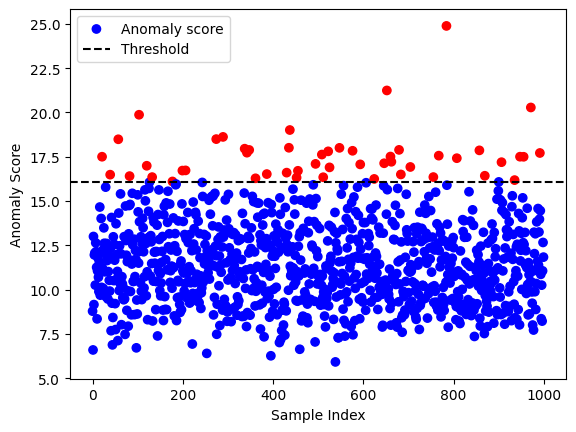

In [28]:

#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()

In [29]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
              src_ip          dest_ip  src_port  dest_port protocol  \
21     38.231.226.53  174.108.182.191     64480      62537      UDP   
39      7.222.148.80  183.118.194.113     40803      49797     ICMP   
57      14.119.240.3    156.201.16.65      1167      63332     ICMP   
82      58.71.147.92    48.136.163.82      6579       4856      UDP   
103    89.145.197.36    18.163.186.62     65172      62054      UDP   
120      99.1.205.76     53.87.67.219      2323       6690      UDP   
132    16.11.149.144    152.236.54.45     45394      55411      UDP   
177      79.53.85.91  232.198.205.156     64604      63539     ICMP   
199   121.146.54.237   249.57.100.111      1387      58449      UDP   
206    34.188.92.181   214.222.130.20      2960       8801     ICMP   
274  124.101.237.131     42.206.11.39     14464      63598     ICMP   
289   153.152.11.132   211.36.233.208     63538       3010      UDP   
337    96.163.130.72  159.186.229.190      9670      1049